# Cleaning

We load the csv file and view the first rows

In [22]:
import pandas as pd

# Cargar el CSV en un DataFrame
df_2016 = pd.read_csv('../data/raw/2016.csv')  

# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar las primeras filas para exploración inicial
df_2016.head(5)


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


We remove the columns that we do not need for our future analysis.

In [23]:
# Eliminar columnas innecesarias (suponiendo que algunas no son útiles para el análisis)
columns_to_drop = ['Lower Confidence Interval', 'Upper Confidence Interval', 'Family', 'Dystopia Residual' ]

df_2016 = df_2016.drop(columns=columns_to_drop)

# Verificar las primeras filas después de eliminar las columnas
print("Después de eliminar columnas innecesarias:")
# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df_2016.head(5)

Después de eliminar columnas innecesarias:


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,1,7.526,1.44178,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,0.81091,0.57104,0.41004,0.25492


Here we have to normalize some columns so that later when doing the merge it is much easier.

In [24]:
# Normalización de nombres de columnas
df_2016.rename(columns={
    'Happiness Rank': 'Happiness_Rank',
    'Happiness Score': 'Happiness_Score',
    'Economy (GDP per Capita)': 'GDP_per_Capita',
    'Health (Life Expectancy)': 'Healthy_life_expectancy',
    'Freedom': 'Freedom',
    'Generosity': 'Generosity',
    'Trust (Government Corruption)': 'Perceptions_of_corruption'
}, inplace=True)

# Mostrar las primeras filas después de renombrar las columnas
print("\nPrimeras filas después de renombrar columnas:")
# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar las primeras filas para exploración inicial
df_2016.head(5)


Primeras filas después de renombrar columnas:


,Country,Region,Happiness_Rank,Happiness_Score,GDP_per_Capita,Healthy_life_expectancy,Freedom,Perceptions_of_corruption,Generosity
0,Denmark,Western Europe,1,7.526,1.44178,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,0.81091,0.57104,0.41004,0.25492


We explore how the data is, what type of data it is, etc.

In [25]:
# Exploración inicial
print("Información general del archivo 2016:")
df_2016.info()

print("\nEstadísticas generales del archivo 2016:")
print(df_2016.describe())

Información general del archivo 2016:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    157 non-null    object 
 1   Region                     157 non-null    object 
 2   Happiness_Rank             157 non-null    int64  
 3   Happiness_Score            157 non-null    float64
 4   GDP_per_Capita             157 non-null    float64
 5   Healthy_life_expectancy    157 non-null    float64
 6   Freedom                    157 non-null    float64
 7   Perceptions_of_corruption  157 non-null    float64
 8   Generosity                 157 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB

Estadísticas generales del archivo 2016:
       Happiness_Rank  Happiness_Score  GDP_per_Capita  \
count      157.000000       157.000000      157.000000   
mean        78.980892

We check that there are no nulls

In [26]:
# Revisar la cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df_2016.isnull().sum())


Valores nulos por columna:
Country                      0
Region                       0
Happiness_Rank               0
Happiness_Score              0
GDP_per_Capita               0
Healthy_life_expectancy      0
Freedom                      0
Perceptions_of_corruption    0
Generosity                   0
dtype: int64


We check for duplicate rows

In [27]:
# Verificar si hay filas duplicadas
duplicados = df_2016.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")

# Si hay duplicados, imprimir las primeras filas duplicadas
if duplicados > 0:
    print("\nPrimeras filas duplicadas:")
    print(df_2016[df_2016.duplicated()].head())

Filas duplicadas: 0


We save the clean file in a csv in the data folder for later use.

In [ ]:
df_2016.to_csv('../data/clean/2016_clean.csv', index=False)
print("archivo guardado exitosamente.")

# Analysis

Analysis 1: Distribution of the variable 'Happiness_Score' with a histogram
We will analyze the distribution of the happiness score of the countries in 2016.

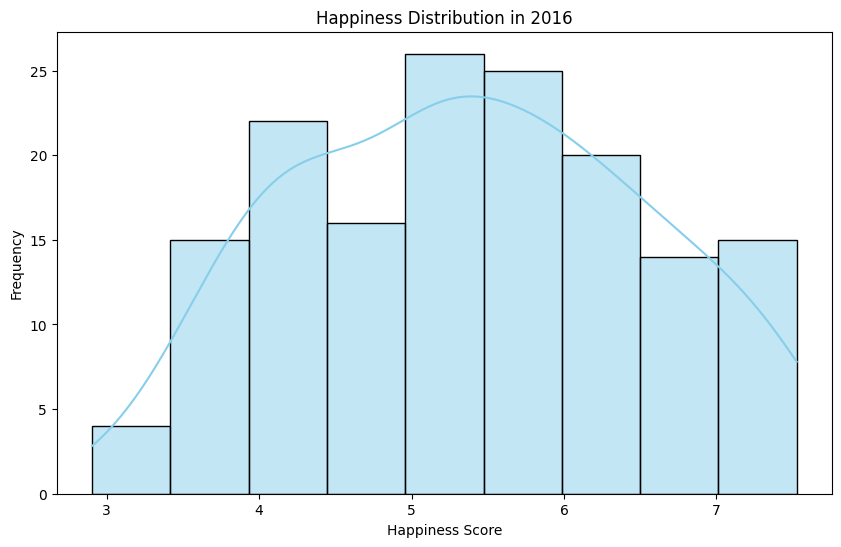

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 2016 dataset
df_2016 = pd.read_csv('../data/clean/2016_clean.csv')

# Display the first rows to inspect the data
df_2016.head()

plt.figure(figsize=(10, 6))
sns.histplot(df_2016['Happiness_Score'], kde=True, color='skyblue')
plt.title('Happiness Distribution in 2016')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()



Analysis 2: Boxplot of 'Happiness_Score' by 'Region'
We will look at the distribution of happiness scores by region in 2016 using a boxplot.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19540\3210616885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Happiness_Score', data=df_2016, palette='Set2')


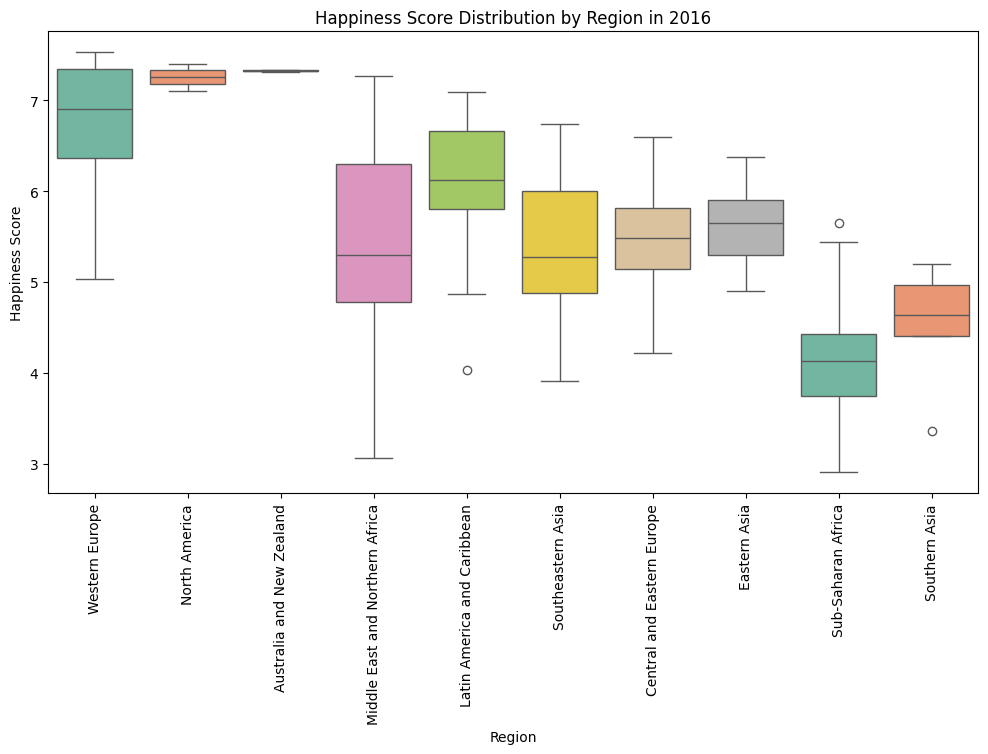

In [2]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Happiness_Score', data=df_2016, palette='Set2')
plt.title('Happiness Score Distribution by Region in 2016')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

Analysis 3: Scatter plot of 'GDP_per_Capita' vs 'Healthy_life_expectancy'
We will explore the relationship between GDP per capita and healthy life expectancy in 2016 with a scatterplot.

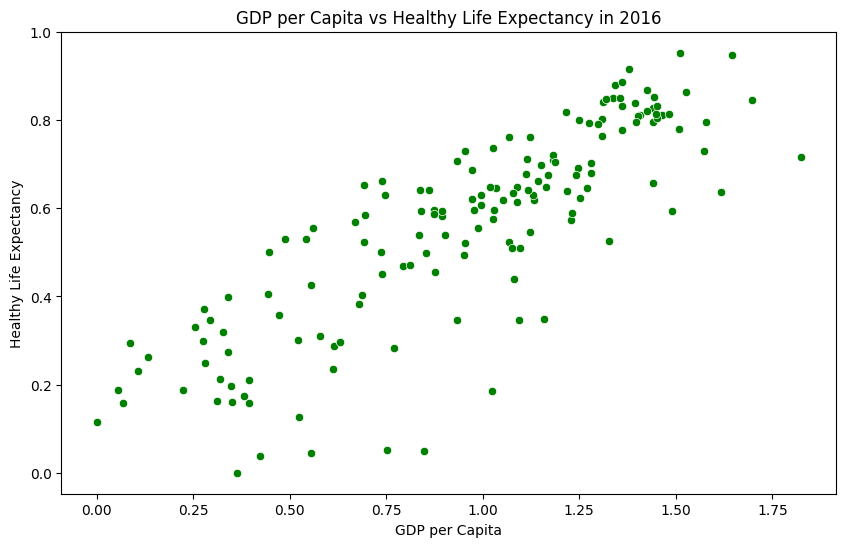

In [3]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_Capita', y='Healthy_life_expectancy', data=df_2016, color='green')
plt.title('GDP per Capita vs Healthy Life Expectancy in 2016')
plt.xlabel('GDP per Capita')
plt.ylabel('Healthy Life Expectancy')
plt.show()


Analysis 4: Violin plot of 'Freedom' by 'Region'
We will examine the distribution of freedom across different regions with a violin plot.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19540\1611487340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Region', y='Freedom', data=df_2016, palette='muted')


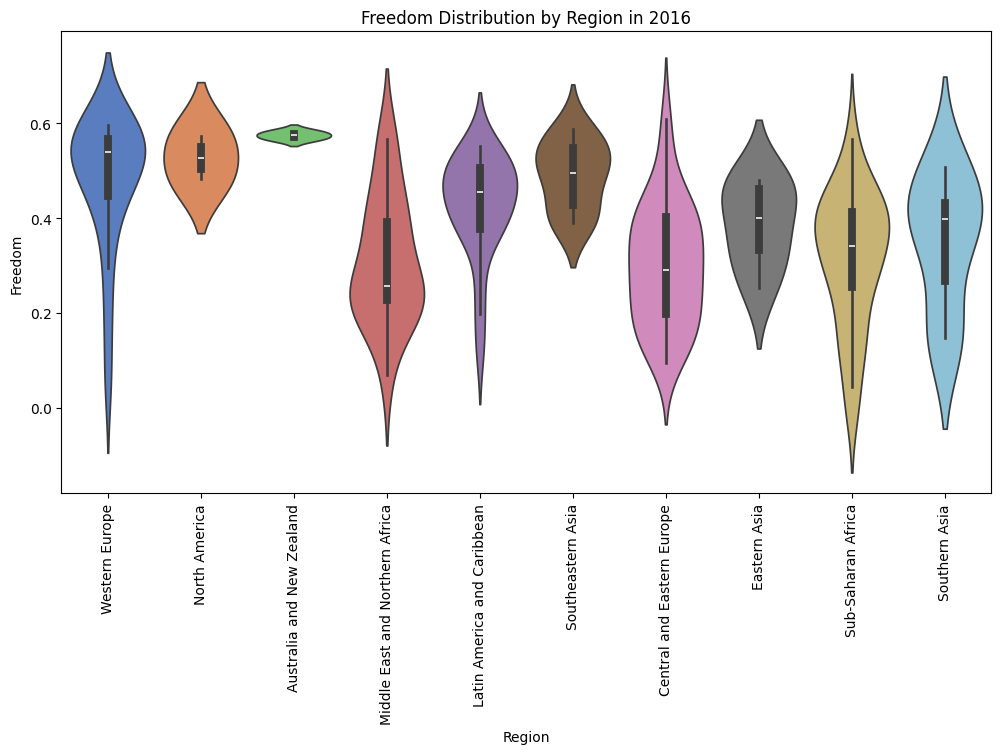

In [4]:

plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='Freedom', data=df_2016, palette='muted')
plt.title('Freedom Distribution by Region in 2016')
plt.xlabel('Region')
plt.ylabel('Freedom')
plt.xticks(rotation=90)
plt.show()

Analysis 5: Pairplot of key variables
We will examine the relationships between several key variables in the dataset with a pairplot.

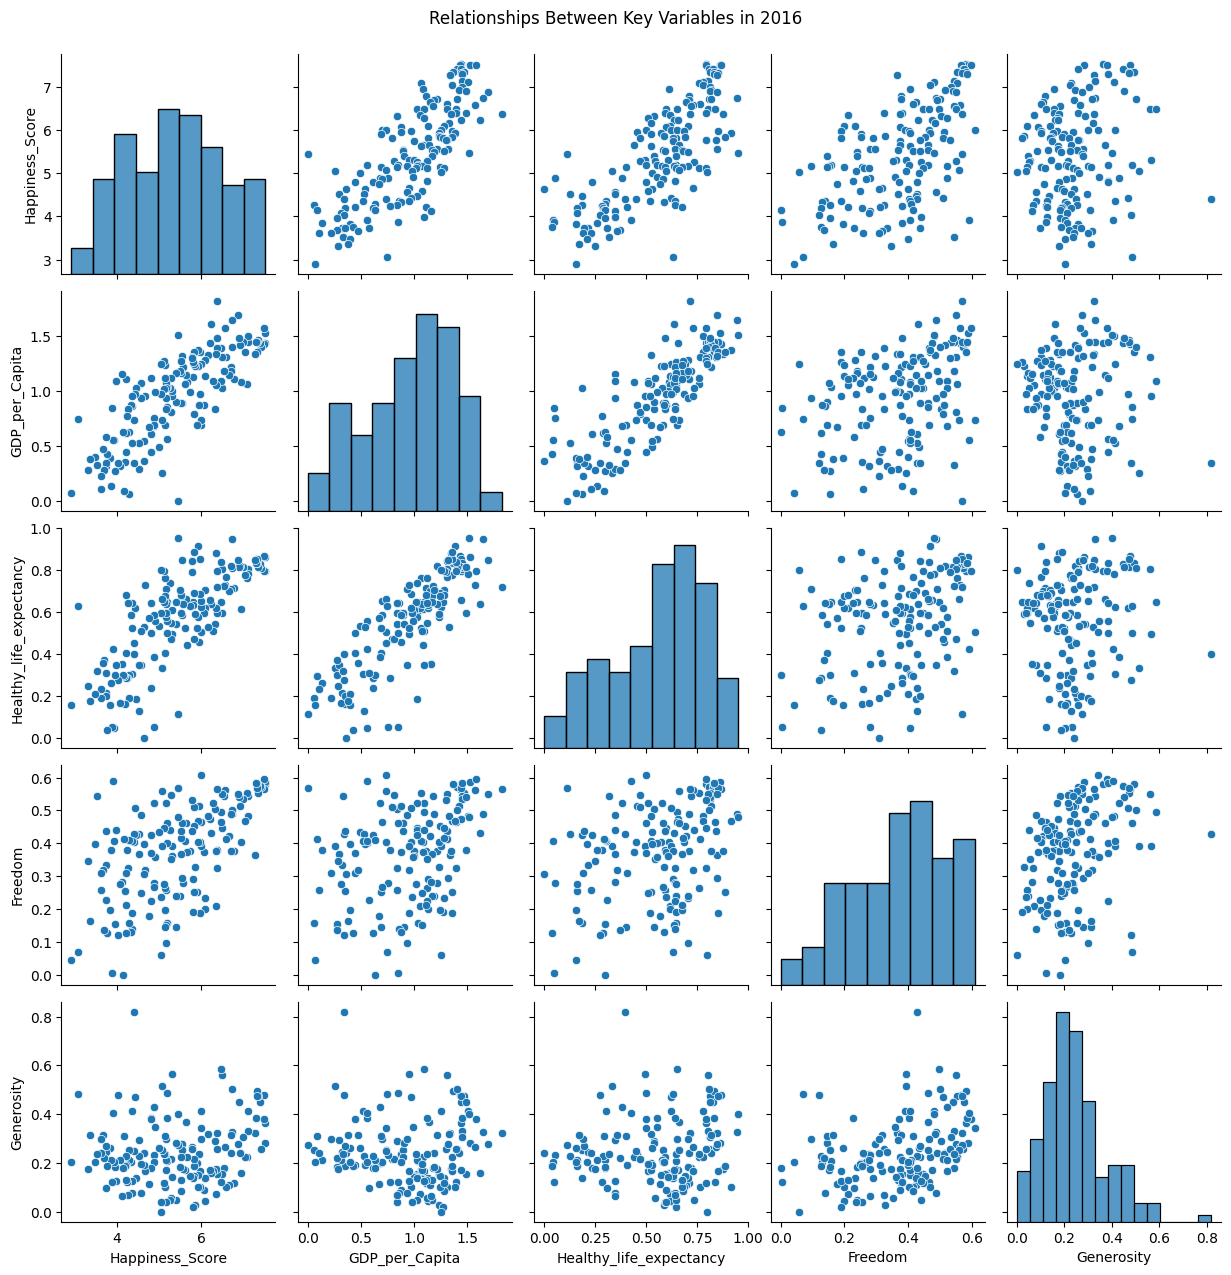

In [5]:
sns.pairplot(df_2016[['Happiness_Score', 'GDP_per_Capita', 'Healthy_life_expectancy', 'Freedom', 'Generosity']])
plt.suptitle('Relationships Between Key Variables in 2016', y=1.02)
plt.show()



Analysis 6: Correlation between main variables using a heatmap
We will show the correlation matrix for the variables in 2016.

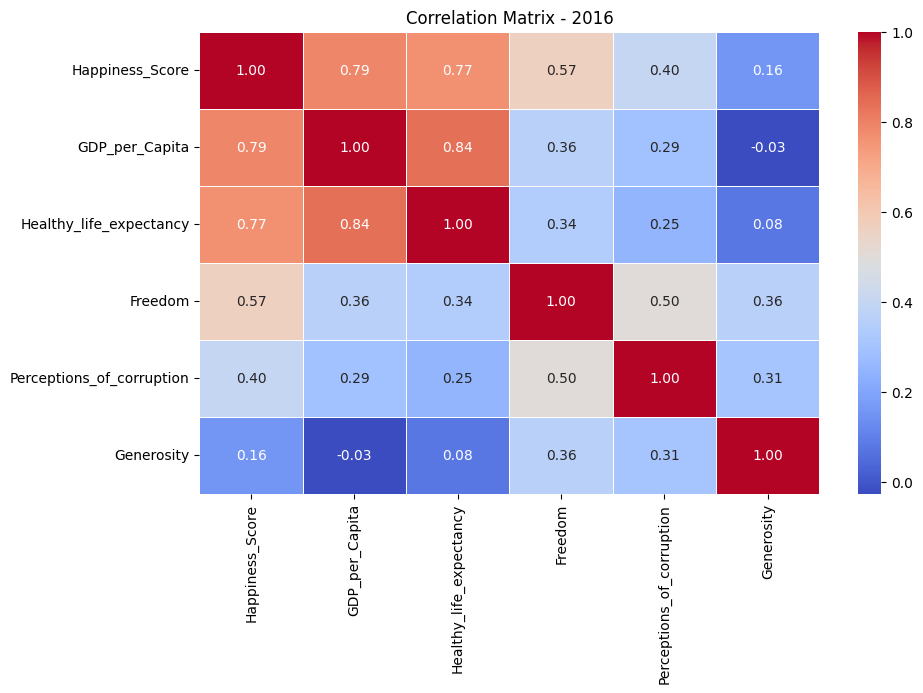

In [6]:
correlation_matrix = df_2016[['Happiness_Score', 'GDP_per_Capita', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - 2016')
plt.show()